# Imporing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the datsets

In [2]:
# train data
train=pd.read_excel('agriculture_train.xlsx')

In [3]:
# test data
test=pd.read_excel('agriculture_test.xlsx')

# Train data(EDA)

In [5]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


Top 5 heads of the train dataset.

In [13]:
train.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


Bottom 5 of the train dataset.

In [7]:
# Checking datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


we have 1 float data type column, 8 integer data type column and 1 object data type column present in the dataset.

In [10]:
# checking shape
train.shape

(4599, 10)

There is 4599 rows and 10 columns are present in the train dataset.

In [11]:
# checking null values
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In Number_Doses_Week column 442 null values are present.

# Handling Null values

In [4]:
train.dropna(inplace=True)

In [5]:
# checking shapes again
train.shape

(4157, 10)

Now we have 4157 rows and 10 columns present in the train dataset.

# Visualization of Nominal Data through count plot

0    3220
1     937
Name: Crop_Type, dtype: int64


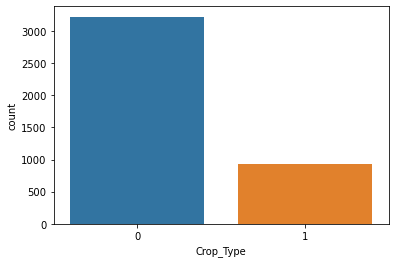

In [16]:
ax=sns.countplot(x='Crop_Type',data=train)
print(train['Crop_Type'].value_counts())

There are two types of crops present in the dataset and there is very big difference between them.

0    2181
1    1976
Name: Soil_Type, dtype: int64


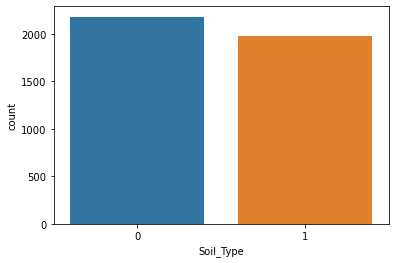

In [17]:
ax=sns.countplot(x='Soil_Type',data=train)
print(train['Soil_Type'].value_counts())

There is not much noticable difference between the types of soil in Soil_Type column.

2    2904
3    1213
1      40
Name: Pesticide_Use_Category, dtype: int64


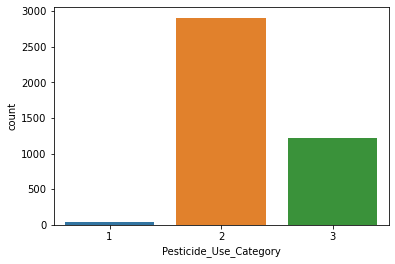

In [18]:
ax=sns.countplot(x='Pesticide_Use_Category',data=train)
print(train['Pesticide_Use_Category'].value_counts())

In Pesticide_Use_Category column Pesticide type 2 is more other than Pesticide type 1 and 3.

2    2090
1    1258
3     809
Name: Season, dtype: int64


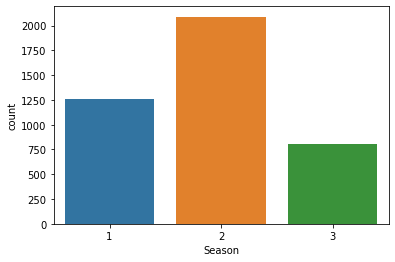

In [20]:
ax=sns.countplot(x='Season',data=train)
print(train['Season'].value_counts())

There is 3 seasons present in the dataset and season 2 is showing maximum number of counts.

0    3465
1     588
2     104
Name: Crop_Damage, dtype: int64


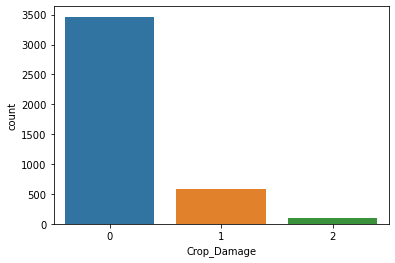

In [21]:
ax=sns.countplot(x='Crop_Damage',data=train)
print(train['Crop_Damage'].value_counts())

In Crop_Damage column 0 is indicating alive crop , 1 indicating damage crop due to other resaons and 3 is indication damage crops due to pesticides.

# Visualization of Numeric data

In [22]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Density'>

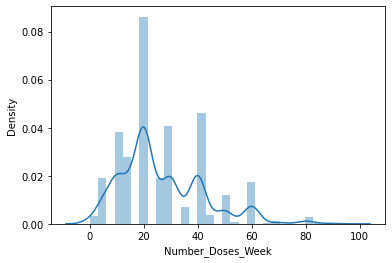

In [23]:
sns.distplot(train['Number_Doses_Week'])

In Number_Doses_Week column data is distributed in between range of 0 to approx 90, and the colunmn is indicating the doses of pesticides in a week.

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

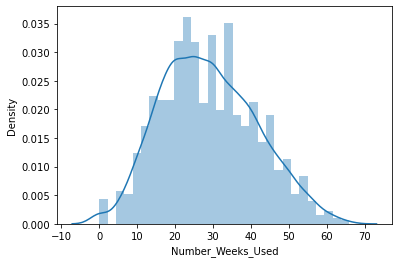

In [25]:
sns.distplot(train['Number_Weeks_Used'])

Number_Weeks_Used column is looking normally distributed, and the column is indicating number of weeks pesticides used.

<AxesSubplot:xlabel='Number_Weeks_Quit', ylabel='Density'>

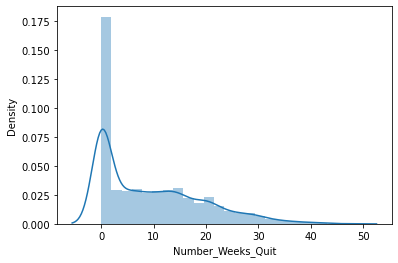

In [26]:
sns.distplot(train['Number_Weeks_Quit'])

Number_Weeks_Quit column is not looking normal it is looking somehow left skewed.

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Density'>

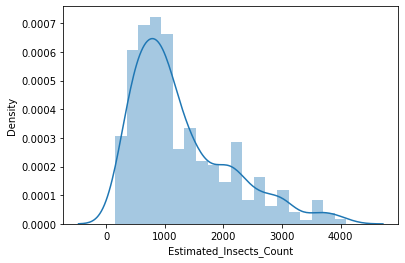

In [56]:
sns.distplot(test['Estimated_Insects_Count'])

Estimated_Insects_Count column is looking somehow normally distributed.

# Checking Outliers

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.227941x0.16413)
Crop_Type                   AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Soil_Type                   AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Pesticide_Use_Category        AxesSubplot(0.125,0.518913;0.227941x0.16413)
Number_Doses_Week          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Number_Weeks_Used          AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Number_Weeks_Quit             AxesSubplot(0.125,0.321957;0.227941x0.16413)
Season                     AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Crop_Damage                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

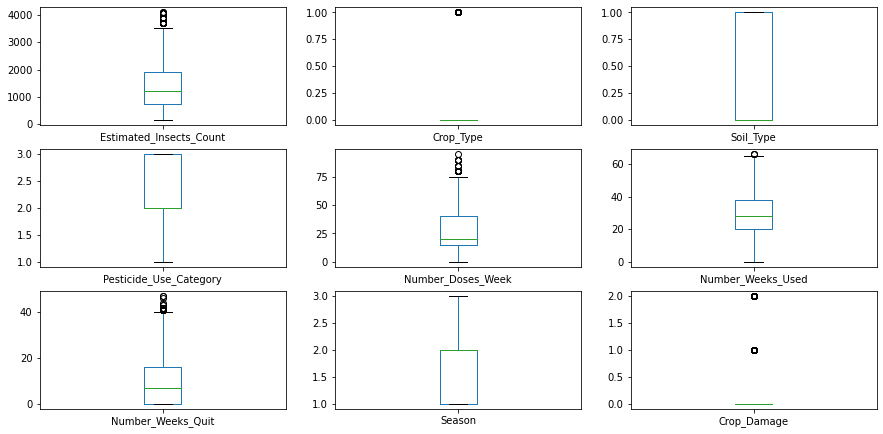

In [27]:
train.plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10))

Outliers are present but very few so if we remove it then we will loose our important data.

# Deleting Unwanted columns

In [6]:
del  train['ID']

# Visualization of Nominal Data

In [29]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


Top 5 heads of the test dataset.

In [30]:
test.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1
1198,F00003150,1212,0,1,2,15,NaN,20,3


Bottom 5 of the test dataset.

In [31]:
# Checking Datatypes
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


We have 1 float data type column, 7 integer datatype columns and 1 object data type columns present in the test dataset.

In [32]:
#checking shape
test.shape

(1199, 9)

there is 1199 rows and 9 columns are present in the test dataset.

In [34]:
# Checking null values
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

There is null values are present in Number_Weeks_Used  column.

In [7]:
# Handling Null values
test.dropna(inplace=True)

In [8]:
# checking shapes again
test.shape

(1080, 9)

Now we have 1080 rows and 9 columns are present in the test dataset.

# Deleting unwanted columns


In [9]:
del test['ID']

# Test Data(EDA)

In [40]:
test.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

0    871
1    209
Name: Crop_Type, dtype: int64


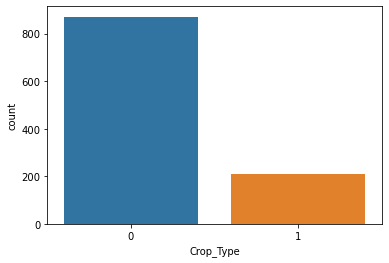

In [41]:
ax=sns.countplot(x='Crop_Type',data=test)
print(test['Crop_Type'].value_counts())

There are 2 crop types in the column and there is also very big difference between them.

0    577
1    503
Name: Soil_Type, dtype: int64


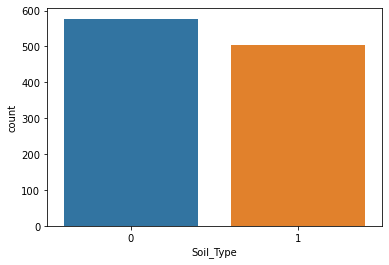

In [42]:
ax=sns.countplot(x='Soil_Type',data=test)
print(test['Soil_Type'].value_counts())

There is not much noticable difference between the type of soil in Soil_Type column.

2    629
3    433
1     18
Name: Pesticide_Use_Category, dtype: int64


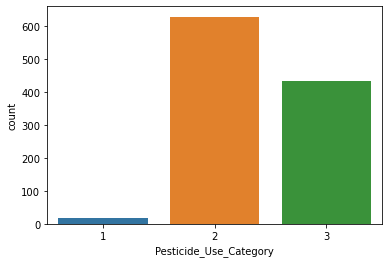

In [43]:
ax=sns.countplot(x='Pesticide_Use_Category',data=test)
print(test['Pesticide_Use_Category'].value_counts())

Pesticides type two is more than pesticide type 1 and 3.

<bound method IndexOpsMixin.value_counts of 1       2
2       2
3       2
4       1
5       2
       ..
1192    2
1194    3
1195    1
1196    1
1197    1
Name: Season, Length: 1080, dtype: int64>


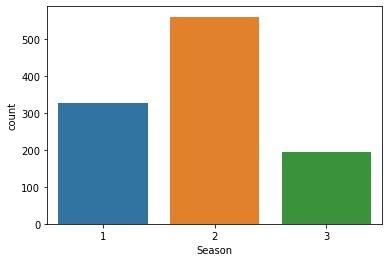

In [44]:
ax=sns.countplot(x='Season',data=test)
print(test['Season'].value_counts)

In Season column there is 3 seasons and season 2 is showing maximum values in numbers.

# Visualization of Numeric Data

<AxesSubplot:xlabel='Estimated_Insects_Count', ylabel='Density'>

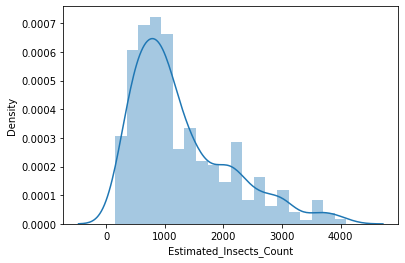

In [47]:
sns.distplot(test['Estimated_Insects_Count'])

Estimated_Insects_Count column is looking somehow normal.

<AxesSubplot:xlabel='Number_Doses_Week', ylabel='Density'>

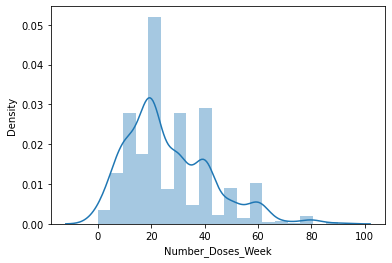

In [49]:
sns.distplot(test['Number_Doses_Week'])

 Number_Doses_Week column data is distributed in between range of 0 to approx 90, and the colunmn is indicating the doses of pesticides in a week.

​

<AxesSubplot:xlabel='Number_Weeks_Used', ylabel='Density'>

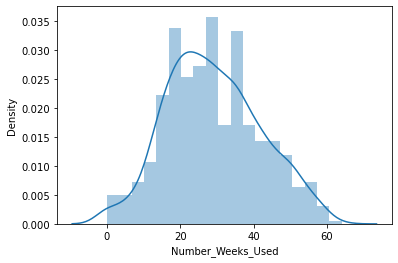

In [54]:
sns.distplot(test['Number_Weeks_Used'])

Number_Weeks_Used column is looking normally distributed, and the column is indicating number of weeks pesticides used.

<AxesSubplot:xlabel='Number_Weeks_Quit', ylabel='Density'>

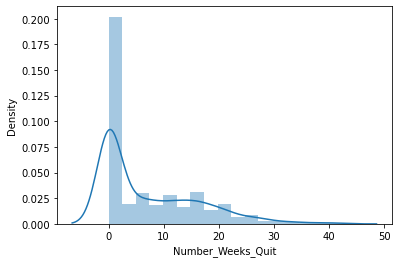

In [55]:
sns.distplot(test['Number_Weeks_Quit'])

Number_Weeks_Quit column is looking bit left skewed.

# Conacating both the Datsets

In [19]:
df=pd.concat([train,test])

In [20]:
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0.0
1,209,1,0,1,0,0.0,0,2,1.0
2,257,1,0,1,0,0.0,0,2,1.0
3,257,1,1,1,0,0.0,0,2,1.0
4,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...
1192,1132,0,1,2,60,14.0,23,2,NaN
1194,1132,0,1,2,40,34.0,7,3,NaN
1195,1132,0,1,2,40,25.0,3,1,NaN
1196,1132,0,1,2,20,13.0,23,1,NaN


In [21]:
# checking null values
df.isnull().sum()

Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1080
dtype: int64

In [22]:
# handling null values
df.dropna(inplace=True)

# Seprating the column into feature and target

In [24]:
x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']

In [25]:
x.shape

(4157, 8)

In [26]:
y.shape

(4157,)

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3325, 8)
(832, 8)
(3325,)
(832,)


# Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score

In [29]:
#LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.84375
[[693   4   0]
 [101   9   0]
 [ 22   3   0]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       697
         1.0       0.56      0.08      0.14       110
         2.0       0.00      0.00      0.00        25

    accuracy                           0.84       832
   macro avg       0.47      0.36      0.35       832
weighted avg       0.79      0.84      0.79       832



In [30]:
# cross validation Logistic Regression
score=cross_val_score(lr,x,y,cv=10)
print('cv score',score.mean())

cv score 0.8277693466172382


Logistic Regression is giving 84% accuracy score and 82% cross validation score.

In [31]:
# Decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7355769230769231
[[586  88  23]
 [ 74  25  11]
 [ 15   9   1]]
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       697
         1.0       0.20      0.23      0.22       110
         2.0       0.03      0.04      0.03        25

    accuracy                           0.74       832
   macro avg       0.37      0.37      0.37       832
weighted avg       0.76      0.74      0.75       832



In [32]:
# cross validation Decision tree Classifier
score=cross_val_score(dt,x,y,cv=10)
print('cv score',score.mean())

cv score 0.6832182576459684


Decision Tree Classifier is giving 73% accuracy score and 68% cross validation score.

In [33]:
# AdaBoost Classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.84375
[[688   9   0]
 [ 96  14   0]
 [ 21   4   0]]
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       697
         1.0       0.52      0.13      0.20       110
         2.0       0.00      0.00      0.00        25

    accuracy                           0.84       832
   macro avg       0.46      0.37      0.37       832
weighted avg       0.78      0.84      0.79       832



In [34]:
# cross validation AdaBoost Classifier
score=cross_val_score(ad,x,y,cv=10)
print('cv score',score.mean())

cv score 0.8135831788693235


AdaBoost classifier is giving 84% accuarcy score and 81% cv score.

In [35]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.828125
[[668  26   3]
 [ 87  21   2]
 [ 20   5   0]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       697
         1.0       0.40      0.19      0.26       110
         2.0       0.00      0.00      0.00        25

    accuracy                           0.83       832
   macro avg       0.42      0.38      0.39       832
weighted avg       0.78      0.83      0.79       832



In [36]:
# cross validation Random Forest Classifier
score=cross_val_score(rf,x,y,cv=10)
print('cv score',score.mean())

cv score 0.7760681186283597


Random Forest classifier is giving  82% accuracy score and 77% cv score.

# Hyper parameter Tuning

In [37]:
from sklearn.model_selection import GridSearchCV


In [38]:
rf=RandomForestClassifier(max_depth=5,random_state=0)
grid_param={'criterion':['gini','entrpoy']}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.83786419281681


In [40]:
# Fianl Model
final_mod=RandomForestClassifier(criterion='gini')
final_mod.fit(x_train,y_train)
pred_y=final_mod.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_y))
score=cross_val_score(final_mod,x,y,cv=5)
print('cv score',score.mean())

accuracy score 0.8245192307692307
cv score 0.811164433490697


So Here we have our final model after Hyper Parameter of Random Forest Classifier,with the accuracy score of 82% and cv score of 81%.

# saving the model

In [41]:
import pickle
filename='agriculture_crop_damage.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction on Test data

In [43]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8449519230769231